## Evaluation

### Individual Buildings

In order to evaluate the performance of a policy $\pi$ on a Bauwerk building $b$, we consider the *expected return* when using policy $\pi$ to operate building $b$,
$$
    \mathbb{E}_{\pi}[\sum_{t=0}^{T}\gamma_b^t R_b(s_t, a_t)],
$$
where $R_b$ is the reward function and $\gamma_b$ is the discount factor of building $b$'s *partially observable Markov decision process* (POMDP), and $s_t$, $a_t$ are random variables of states and actions visited under policy $\pi$. This value is basically the expected cost of using policy $\pi$ as a controller in building $b$.

Below we compute this expected return for a random policy.

In [2]:
import gym
import bauwerk

NUM_SAMPLES = 10

def estimate_exp_rew(num_samples, len_episode ):
    env = gym.make("bauwerk/House-v0")
    env.reset()
    cum_rewards = []

    for i in range(num_samples):
        cum_rewards.append(0)
        while range(10**6):
            obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
            cum_rewards[i] += reward
            if terminated or truncated:
                env.reset()
                break

    overall_reward = sum(cum_rewards)/num_samples
    return overall_reward

overall_reward = estimate_exp_rew(num_samples=NUM_SAMPLES)
print(f"Expected reward with random policy (estimated using {NUM_SAMPLES} samples): {overall_reward}")

Expected reward with random policy (estimated using 10 samples): -8549.335485292095


Next we quickly look at how the number of samples affects the estimate.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

nums_samples = np.arange(1,21)
estimates = []



for num_samples in nums_samples:
    estimates.append(estimate_exp_rew(num_samples=num_samples))

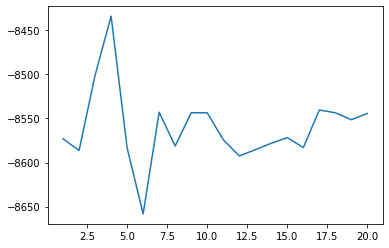

In [11]:
plt.plot(nums_samples, estimates)

Instead of using 

In [2]:
import gym
import bauwerk

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Timing env simulation
%timeit

def estimate_exp_rew(num_steps):
    env = gym.make("bauwerk/House-v0")
    env.reset()
    for i in range(num_steps):
        obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        if terminated or truncated:
            env.reset()
            print(f"env resetted {i}")

estimate_exp_rew(num_steps=24*365)

env resetted 8758
env resetted 17517
env resetted 26276
env resetted 35035
env resetted 43794
env resetted 52553
env resetted 61312
env resetted 70071
env resetted 78830
env resetted 87589
